In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementNotInteractableException
from time import sleep

import pandas as pd
import matplotlib.pyplot as pl
from datetime import datetime

In [2]:
price = input('Digite o valor do carro:')

In [3]:
# Passa a resolução da tela
options = Options()
# options.add_argument('window-size=600,800')
navegador = webdriver.Chrome(options=options)

The chromedriver version (125.0.6422.78) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (126.0.6478.61); currently, chromedriver 126.0.6478.63 is recommended for chrome 126.*, so it is advised to delete the driver in PATH and retry


In [4]:
url = "https://lista.mercadolivre.com.br/veiculos"
navegador.get(url)
sleep(1)

In [5]:
navegador.execute_script('window.scrollTo(0, 200)')
input_element = navegador.find_element(By.CSS_SELECTOR, '#\:Rpi9ele6\:')
input_element.send_keys(price)
sleep(1)
input_button = navegador.find_element(By.CSS_SELECTOR, '#root-app > div > div.ui-search-main.ui-search-main--only-products.ui-search-main--with-topkeywords > aside > section.ui-search-filter-groups > div:nth-child(9) > ul > li:nth-child(4) > form > div:nth-child(3) > button')
input_button.click()

In [6]:
founded_cars = []

while(len(founded_cars) < 1000):
    # Beatiful Soup
    mercado_livre = BeautifulSoup(navegador.page_source, 'html.parser')

    carros = mercado_livre.findAll('div', class_="andes-card ui-search-result ui-search-result--mot andes-card--flat andes-card--padding-16 andes-card--animated")

    for carro in carros:
        carro_nome = carro.find('img', class_="ui-search-result-image__element")['alt']
        carro_preco = carro.find('span', class_="andes-money-amount ui-search-price__part ui-search-price__part--medium andes-money-amount--cents-superscript")['aria-label']
        carro_atributos = carro.findAll('li', class_="ui-search-card-attributes__attribute")
        carro_ano = carro_atributos[0].text
        carro_quilometragem = carro_atributos[1].text
        cidade, estado = carro.find('span', class_='ui-search-item__group__element ui-search-item__location').text.rsplit('-', 1)
        founded_cars.append({'nome': carro_nome, 'preço': carro_preco, 'ano' : carro_ano, 'quilometragem': carro_quilometragem, 'cidade': cidade, 'estado': estado})

    navegador.execute_script('window.scrollTo(0, document.body.scrollHeight)')
    sleep(1)

    next_page = navegador.find_element(By.CSS_SELECTOR, '#root-app > div > div.ui-search-main.ui-search-main--only-products.ui-search-main--with-topkeywords > section > nav > ul > li.andes-pagination__button.andes-pagination__button--next > a')
    try: 
        next_page.click()
    except ElementNotInteractableException as e: 
        break

navegador.close()

TypeError: object of type 'NoneType' has no len()

Mostra os primeiros 1000 carros encontrados

In [ ]:
print(founded_cars)

[{'nome': 'Renault Clio 1.0 Campus 16v', 'preço': '23990 reais', 'ano': '2012', 'quilometragem': '149.160 Km', 'cidade': 'São Bernardo do Campo ', 'estado': ' São Paulo'}, {'nome': 'Peugeot 207 1.4 Xr Flex 5p', 'preço': '19990 reais', 'ano': '2011', 'quilometragem': '141.000 Km', 'cidade': 'São Paulo Zona Leste ', 'estado': ' São Paulo'}, {'nome': 'Renault Sandero 1.0 16v Expression Hi-flex 5p', 'preço': '23900 reais', 'ano': '2010', 'quilometragem': '123.798 Km', 'cidade': 'Diadema ', 'estado': ' São Paulo'}, {'nome': 'Chevrolet Celta 1.0 Ls Flex Power 3p', 'preço': '22900 reais', 'ano': '2012', 'quilometragem': '130.000 Km', 'cidade': 'São Paulo Zona Norte ', 'estado': ' São Paulo'}, {'nome': 'Renault Sandero 1.0 16v Expression Hi-flex 5p', 'preço': '24800 reais', 'ano': '2011', 'quilometragem': '220.000 Km', 'cidade': 'São Bernardo do Campo ', 'estado': ' São Paulo'}, {'nome': 'Chevrolet Celta 1.0 Spirit Flex Power 5p', 'preço': '22890 reais', 'ano': '2010', 'quilometragem': '238.00

DATAFRAME com Pandas

In [ ]:
df = pd.DataFrame(founded_cars)
df.tail(5)

,nome,preço,ano,quilometragem,cidade,estado
1003,Chevrolet Celta 1.0 Life Flex Power 5p,15500 reais,2007,220.849 Km,Guarulhos,São Paulo
1004,Ford Ka 1.0 Gl 3p,11900 reais,2004,163.000 Km,São Paulo Zona Norte,São Paulo
1005,Fiat Uno 1.0 Smart 5p Gasolina,7500 reais,2001,200.000 Km,Itapecerica da Serra,São Paulo
1006,Renault Clio 1.0 Campus 16v Flex 2p Manual,21890 reais,2011,87.000 Km,São Paulo Zona Leste,São Paulo
1007,Ford Ka 1.0 3p,9000 reais,1998,55.000 Km,Guarulhos,São Paulo


Limpando coluna preços

In [ ]:
# Tirando reis da coluna preço
df['preço'] = df['preço'].str.replace(' reais', '')
# transformando coluna preço em float
df['preço'] = df['preço'].astype(float)
# transformando coluna ano em int
df['ano'] = df['ano'].astype(int)

Matplotlib

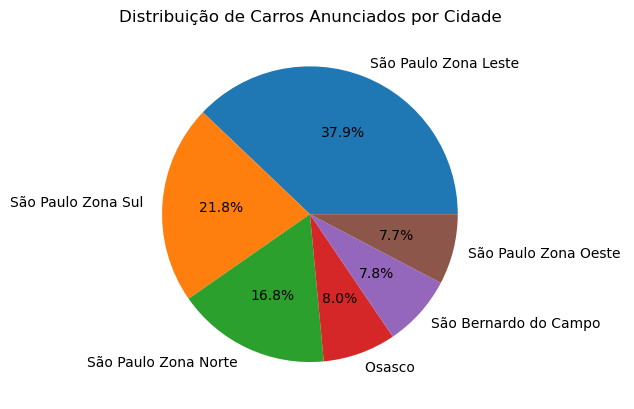

In [ ]:
# Mostrando as 6 primeiras cidades com a maior quantidade de carros anunciados
cidades_quantidades = df['cidade'].value_counts().head(6)
pl.title("Distribuição de Carros Anunciados por Cidade")
pl.pie(cidades_quantidades.values, labels=cidades_quantidades.index, autopct='%1.1f%%');

Quantidade de carros por cidade

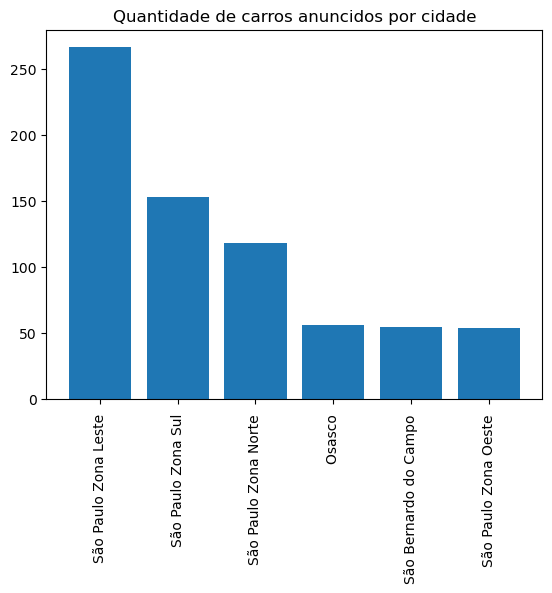

In [ ]:
pl.title("Quantidade de carros anuncidos por cidade")
pl.bar(cidades_quantidades.index, cidades_quantidades.values)
pl.xticks(rotation='vertical');

Média do preço de carro por Marca

In [ ]:
# Para cada registro quero pegar o nome, dar 1 spit no mesmo criar 1 nova coluna e colocar a marca
df['marca'] = df['nome'].apply(lambda x : x.split()[0])

Porcentagem de carros anunciados por marca

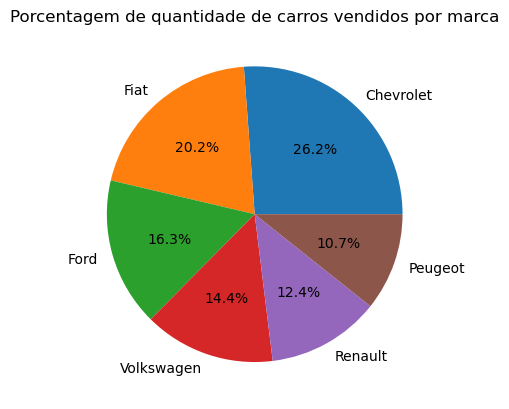

In [ ]:
marca_quantidade = df['marca'].value_counts().head(6)
pl.title("Porcentagem de quantidade de carros vendidos por marca")
pl.pie(marca_quantidade.values, labels=marca_quantidade.index, autopct='%1.1f%%');

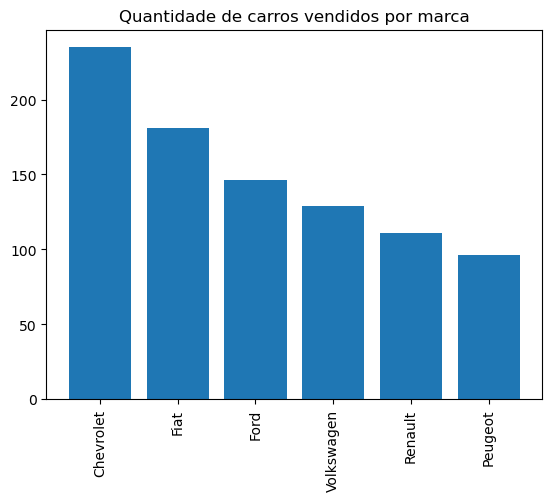

In [ ]:
pl.title("Quantidade de carros vendidos por marca")
pl.bar(marca_quantidade.index, marca_quantidade.values)
pl.xticks(rotation='vertical');

In [ ]:
# Pega o ano mais próximo do atual
ano_atual = datetime.now().year
ano_mais_atual = df.loc[df['ano'] <= ano_atual, 'ano'].max()

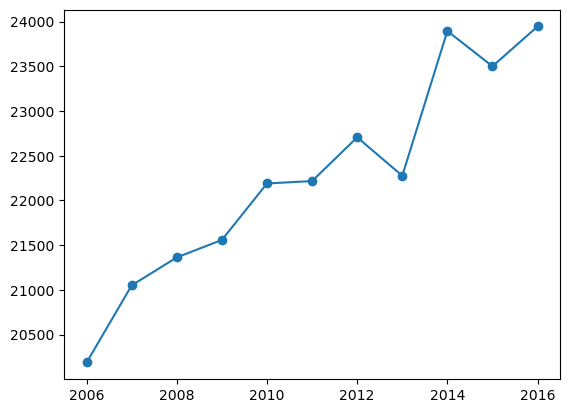

In [ ]:
# Plotando gráfico a partir do ano mais atual dos carros achados - 10 anos, para pegar a media do valor dos carros por ano
ultimos_10_anos = df[df['ano'] >= (ano_mais_atual - 10)].copy()
media_ano = ultimos_10_anos.groupby('ano')['preço'].mean()
pl.plot(media_ano.index, media_ano.values, marker= 'o');

Salvando aquivo .csv

In [ ]:
df.to_csv('dataset/carros.csv', sep=';', index=False)